In [35]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf
import stockstats
from stockstats import StockDataFrame

In [8]:
data_path = 'data'
if not os.path.exists(data_path):
    os.makedirs(data_path)

In [9]:
def DownloadStocksData(tic, period='2y', cache=True):
    file_path = f'{data_path}/{tic}.csv'
    if cache and os.path.exists(file_path):
        return pd.read_csv(file_path, index_col='Date')
    df = yf.download(tic, period=period, group_by='ticker')
    df.to_csv(file_path)
    return df

In [10]:
# gold = DownloadStocksData('GOLDBEES.NS')
# sbin = DownloadStocksData('SBIN.NS')

In [11]:
nifty50 = pd.read_csv('nifty50.csv')
stock_list = nifty50['Symbol'][1:]
for x in stock_list:
    DownloadStocksData(x+'.NS')

In [12]:
all_df = []
for x in stock_list:
    df = DownloadStocksData(x+'.NS')
    df = df[['Close']]
    df.columns = [x]
    all_df.append(df)
    
nifty50 = pd.concat(all_df, axis=1)

### Coerrelation

In [65]:
corr = nifty50.corr()

In [88]:
corr['LT'].sort_values()

HEROMOTOCO    0.184777
BRITANNIA     0.325044
DRREDDY       0.356067
BPCL          0.435629
HINDUNILVR    0.591523
HDFCLIFE      0.661829
BAJAJ-AUTO    0.697953
COALINDIA     0.725557
RELIANCE      0.727948
MARUTI        0.730874
NESTLEIND     0.762903
SHREECEM      0.779453
EICHERMOT     0.782615
BHARTIARTL    0.814050
CIPLA         0.817775
KOTAKBANK     0.841669
INDUSINDBK    0.846448
ITC           0.848316
M&M           0.856801
UPL           0.873104
HDFCBANK      0.873518
DIVISLAB      0.883550
HDFC          0.887343
JSWSTEEL      0.887639
TATACONSUM    0.894130
AXISBANK      0.901365
ADANIPORTS    0.908375
TATASTEEL     0.910491
NTPC          0.917501
HCLTECH       0.918151
SBILIFE       0.920822
IOC           0.920900
TCS           0.936662
ONGC          0.937694
WIPRO         0.943273
ASIANPAINT    0.945877
TECHM         0.949630
SUNPHARMA     0.951334
ULTRACEMCO    0.951634
INFY          0.952759
HINDALCO      0.952920
TITAN         0.954848
POWERGRID     0.961565
BAJAJFINSV 

<AxesSubplot:xlabel='Date'>

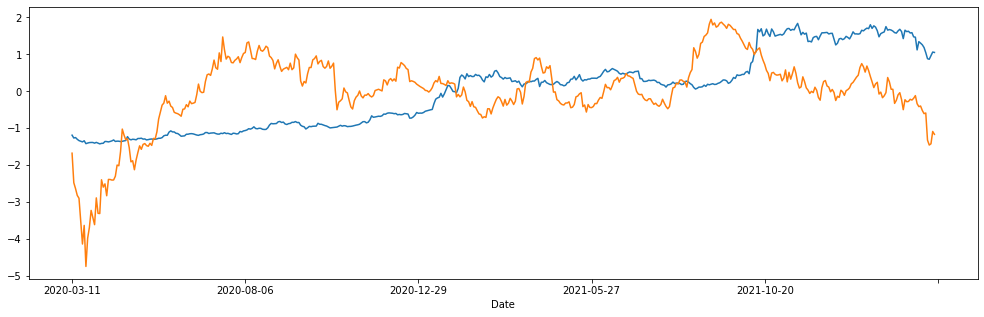

In [83]:
def Normalize(col):
    df = nifty50[col]
    df = (df-df.mean()) / df.std()
    return df

plt.figure(figsize=(17,5))
Normalize('TATAMOTORS').plot()
Normalize('BRITANNIA').plot()
# Normalize('SBIN').plot()

### Above 200 SMA

In [59]:
def getSMA(tic):
    df = DownloadStocksData(tic)
    sdf = stockstats.wrap(df)
    
    sma = sdf['close_200_sma'][-1]
    close = sdf['close'][-1]
    
    return {
        'tic': tic,
        'sma': sma,
        'close': close,
        'score': (close-sma) / sma
    }

In [60]:
sma_details = [getSMA(x+'.NS') for x in stock_list]

In [64]:
pd.DataFrame(sorted(sma_details, key=lambda x: abs(x['score'])))

,tic,sma,close,score
0,ADANIPORTS.NS,732.122751,729.450012,-0.003651
1,LT.NS,1737.171246,1728.650024,-0.004905
2,BAJAJFINSV.NS,15728.222212,15569.000000,-0.010123
3,JSWSTEEL.NS,676.883000,669.750000,-0.010538
4,TCS.NS,3558.569240,3599.149902,0.011404
5,SBIN.NS,464.767000,470.350006,0.012012
6,RELIANCE.NS,2343.586504,2399.149902,0.023709
7,TATAMOTORS.NS,404.092501,418.149994,0.034788
8,GRASIM.NS,1624.506252,1566.250000,-0.035861
9,NTPC.NS,126.841000,131.949997,0.040279
